In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import numpy as np
import random
import pandas as pd
from pandas.tools import plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df= pd.read_csv('land_train.csv')

In [6]:
df.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6,target
0,323,229,120,517,209,115,0.623234,-1.047476,1.473405,0.380537,-0.021277,0.424242,1
1,335,220,109,387,149,89,0.560484,-1.004514,1.200777,0.324813,-0.101010,0.444030,1
2,255,150,52,184,72,45,0.559322,-0.996822,0.825000,0.300728,-0.072165,0.437500,1
3,254,182,73,413,156,84,0.699588,-1.151258,1.425354,0.436268,0.070064,0.451670,1
4,257,219,100,722,254,130,0.756691,-1.236199,1.990973,0.506155,0.130435,0.479508,1


In [7]:
#Looking at data types
df.dtypes

X1          int64
X2          int64
X3          int64
X4          int64
X5          int64
X6          int64
I1        float64
I2        float64
I3        float64
I4        float64
I5        float64
I6        float64
target      int64
dtype: object

In [8]:
df.shape

(110000, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 13 columns):
X1        110000 non-null int64
X2        110000 non-null int64
X3        110000 non-null int64
X4        110000 non-null int64
X5        110000 non-null int64
X6        110000 non-null int64
I1        110000 non-null float64
I2        110000 non-null float64
I3        110000 non-null float64
I4        110000 non-null float64
I5        110000 non-null float64
I6        110000 non-null float64
target    110000 non-null int64
dtypes: float64(6), int64(7)
memory usage: 10.9 MB


In [10]:
df.describe()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6,target
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,505.820582,778.290627,819.375336,1752.844418,1078.027418,739.470318,0.384085,-0.712814,1.615682,0.304885,-0.046779,0.328729,1.909091
std,428.347173,529.490028,674.422188,693.583645,868.842300,797.061740,0.387576,0.472998,1.652829,0.262865,0.421622,0.268098,0.995864
min,0.000000,79.000000,0.000000,77.000000,52.000000,25.000000,-0.517672,-1.566332,-2.842839,-0.390293,-0.904241,-0.822989,1.000000
25%,172.000000,333.000000,211.000000,1209.000000,256.000000,190.000000,-0.006770,-1.212487,-0.042051,0.041264,-0.474310,0.035974,1.000000
50%,540.000000,809.500000,817.000000,1785.000000,863.000000,346.000000,0.222476,-0.681110,1.048291,0.210903,0.170455,0.394099,2.000000
75%,699.000000,1022.000000,1237.000000,2148.000000,1601.000000,1245.000000,0.810632,-0.186692,3.352103,0.587857,0.257062,0.463504,3.000000
max,9346.000000,9615.000000,9877.000000,9316.000000,8249.000000,7180.000000,1.000000,1.144574,5.833693,0.930116,1.000000,0.881131,4.000000


### Looking at Distribution of different Features

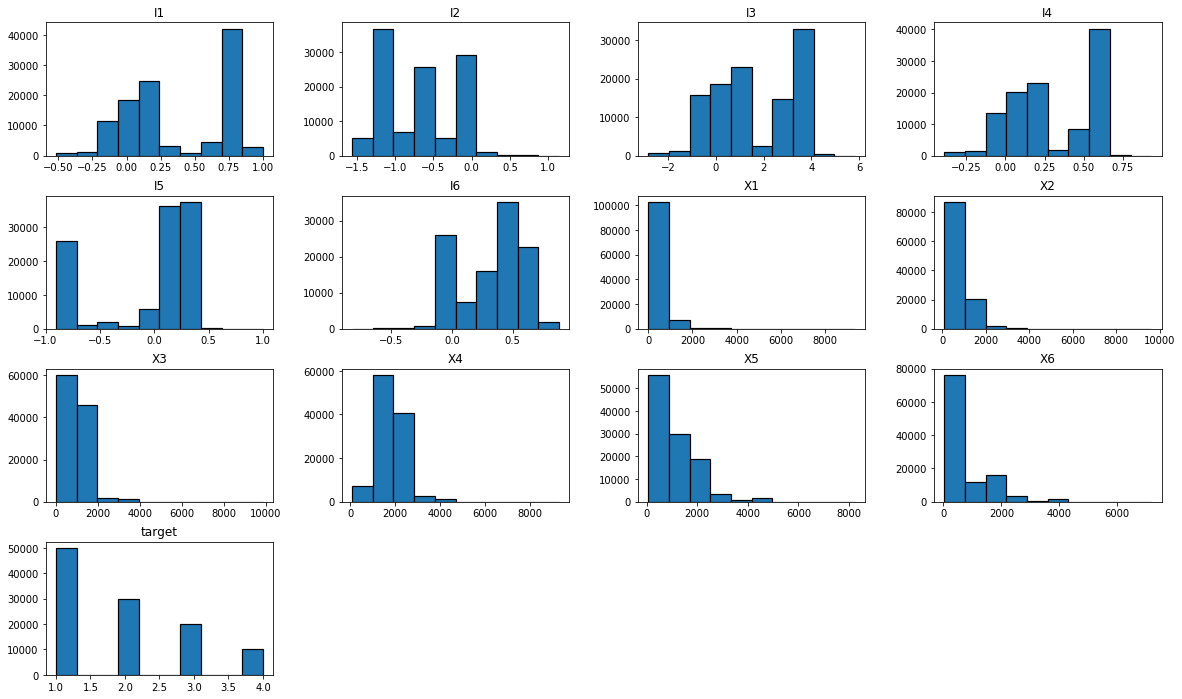

In [11]:
df.hist(edgecolor='black', linewidth=1.2,grid=False)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

### Now let us see how the effect of each feature on the final target result.

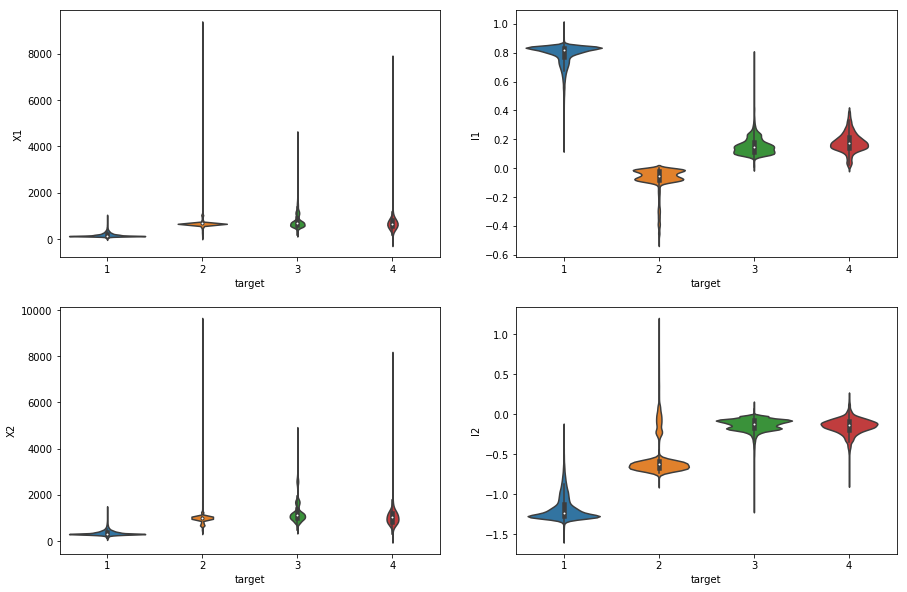

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='X1',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='I1',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='X2',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='I2',data=df)


plt.show()

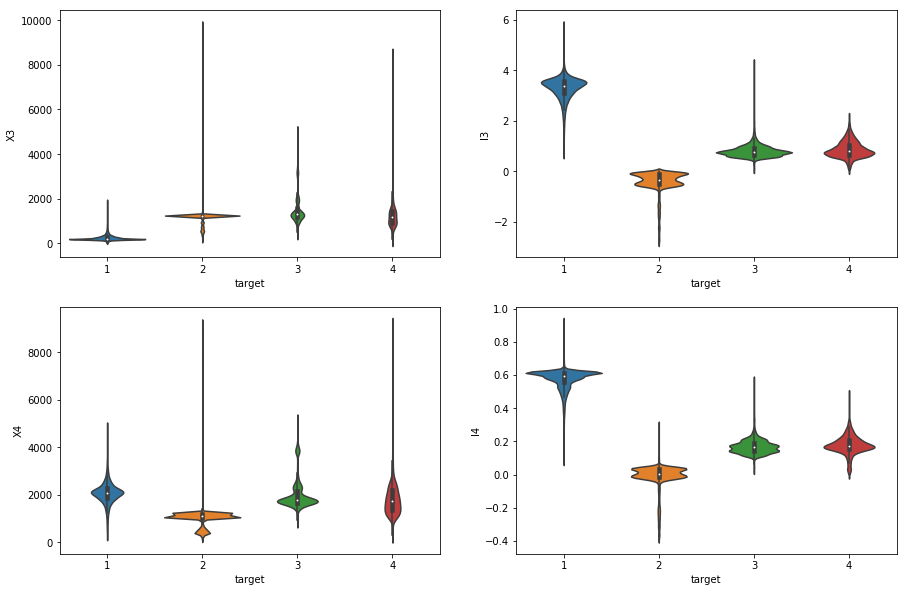

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='X3',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='I3',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='X4',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='I4',data=df)
plt.show()

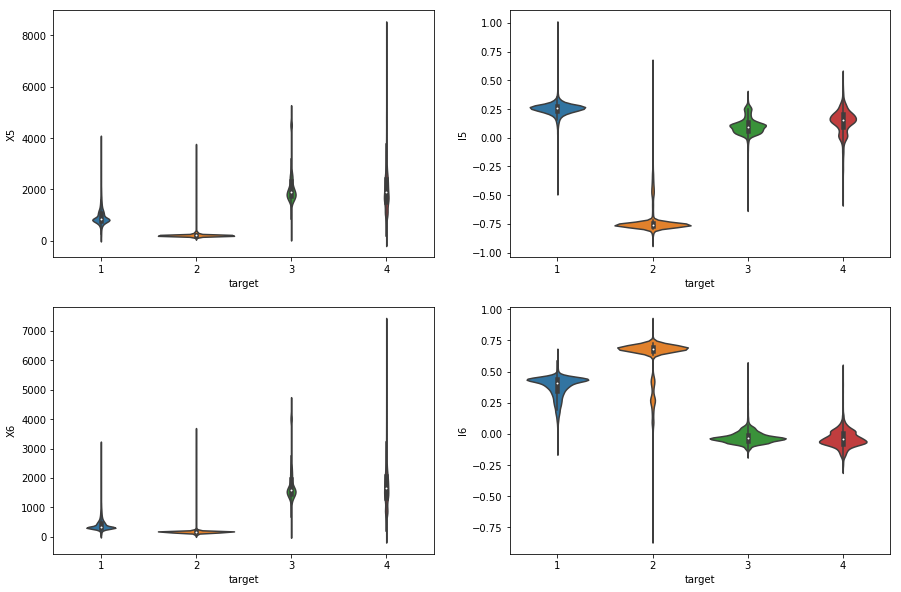

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='target',y='X5',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='I5',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='X6',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='I6',data=df)
plt.show()

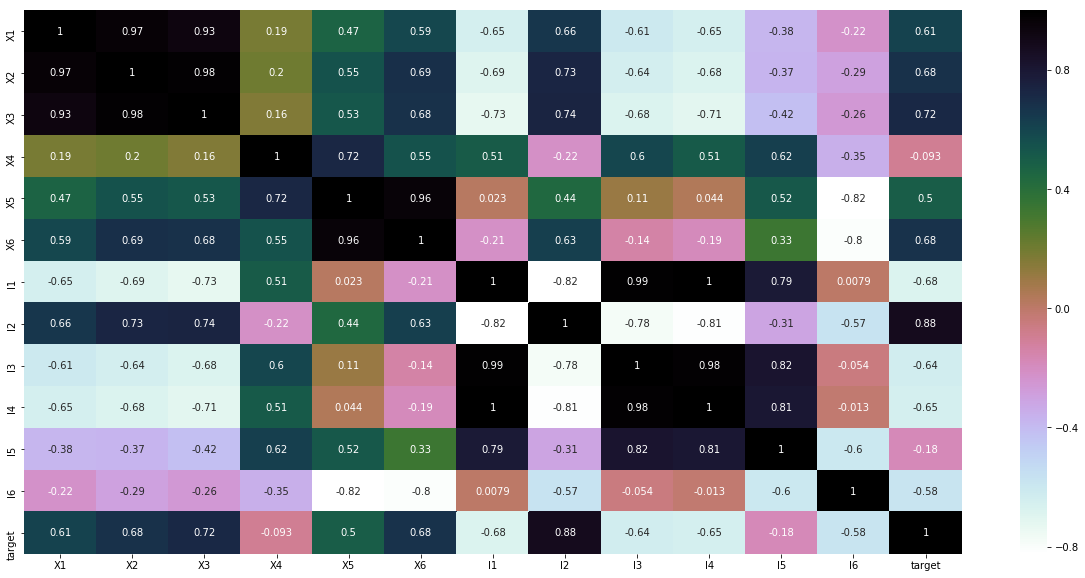

In [15]:
plt.figure(figsize=(21,10)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()


It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

If we apply .corr directly to our dataframe, it will return all pairwise correlations between our columns; that's why we then observe 1s at the diagonal of our matrix (each column is perfectly correlated with itself).

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

<B> Positive Correlation :</B> both variables change in the same direction.
<B> Neutral Correlation:</B> No relationship in the change of the variables.
<B> Negative Correlation:</B> variables change in opposite directions.

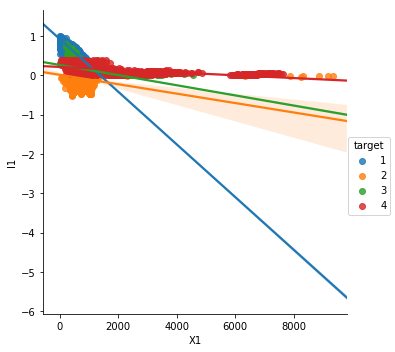

In [16]:
g = sns.lmplot(x="X1", y="I1", hue="target", data=df)

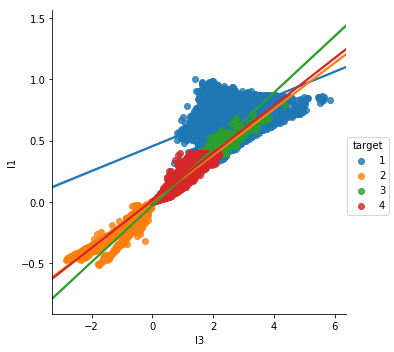

In [17]:
g = sns.lmplot(x="I3", y="I1", hue="target", data=df)

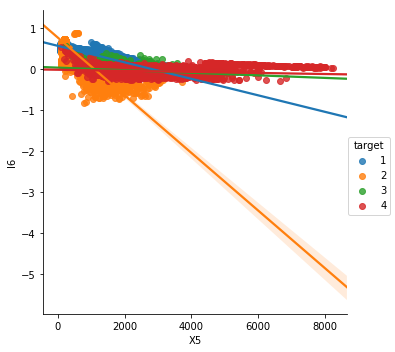

In [18]:
g = sns.lmplot(x="X5", y="I6", hue="target", data=df)

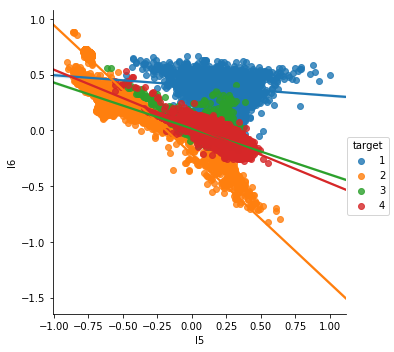

In [19]:
g = sns.lmplot(x="I5", y="I6", hue="target", data=df)

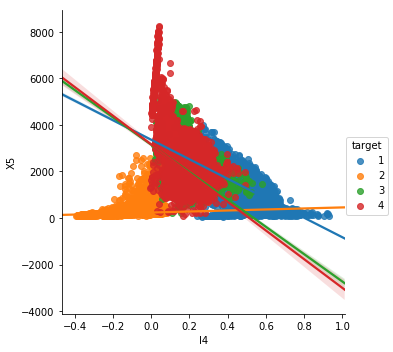

In [20]:
g = sns.lmplot(x="I4", y="X5", hue="target", data=df)

In [21]:
#Looking for features
df.columns.values

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'I1', 'I2', 'I3', 'I4', 'I5',
       'I6', 'target'], dtype=object)

In [22]:
target = df['target'].unique()
target

array([1, 2, 4, 3])

In [23]:
classes=len(target)
classes

4

In [24]:
X=df.drop('target',axis=1)

In [25]:
X.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6
0,323,229,120,517,209,115,0.623234,-1.047476,1.473405,0.380537,-0.021277,0.424242
1,335,220,109,387,149,89,0.560484,-1.004514,1.200777,0.324813,-0.101010,0.444030
2,255,150,52,184,72,45,0.559322,-0.996822,0.825000,0.300728,-0.072165,0.437500
3,254,182,73,413,156,84,0.699588,-1.151258,1.425354,0.436268,0.070064,0.451670
4,257,219,100,722,254,130,0.756691,-1.236199,1.990973,0.506155,0.130435,0.479508


In [26]:
Y=pd.DataFrame(df['target'])

In [27]:
Y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [28]:
Y_dum=pd.get_dummies(df['target']).values

In [29]:
X=X.values

In [30]:
Y=Y.values

In [31]:
Y

array([[1],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]])

In [32]:
Y_dum

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.utils import np_utils
from keras.models import Sequential

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_dum, test_size=0.2,random_state=42,stratify=Y,shuffle=True)

In [58]:
X_train.shape

(88000, 12)

In [59]:
X_test.shape

(22000, 12)

In [60]:
y_train

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [61]:
# Creating a model
np.random.seed(1337)
#while initializing weights using w=np.random.random*np.sqrt(2/n[l-1])
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(7, activation='sigmoid', input_shape=(12,)))

# Add one hidden layer 
model.add(Dense(6, activation='sigmoid'))

# Add an output layer 
model.add(Dense(classes, activation='sigmoid'))

In [62]:
# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
history=model.fit(X_train, y_train, epochs=50, validation_split=0.2,verbose=2, batch_size=128,
                                    initial_epoch=0, shuffle=True)



Train on 70400 samples, validate on 17600 samples
Epoch 1/50
 - 1s - loss: 1.0563 - acc: 0.5690 - val_loss: 0.7919 - val_acc: 0.9033
Epoch 2/50
 - 1s - loss: 0.5741 - acc: 0.9002 - val_loss: 0.4151 - val_acc: 0.9048
Epoch 3/50
 - 1s - loss: 0.3493 - acc: 0.9004 - val_loss: 0.2970 - val_acc: 0.9051
Epoch 4/50
 - 1s - loss: 0.2815 - acc: 0.8985 - val_loss: 0.2563 - val_acc: 0.9052
Epoch 5/50
 - 1s - loss: 0.2548 - acc: 0.8994 - val_loss: 0.2418 - val_acc: 0.9047
Epoch 6/50
 - 1s - loss: 0.2428 - acc: 0.8986 - val_loss: 0.2289 - val_acc: 0.9041
Epoch 7/50
 - 1s - loss: 0.2327 - acc: 0.8992 - val_loss: 0.2249 - val_acc: 0.9042
Epoch 8/50
 - 1s - loss: 0.2295 - acc: 0.8991 - val_loss: 0.2199 - val_acc: 0.9049
Epoch 9/50
 - 1s - loss: 0.2205 - acc: 0.9004 - val_loss: 0.2143 - val_acc: 0.9039
Epoch 10/50
 - 1s - loss: 0.2136 - acc: 0.8998 - val_loss: 0.2091 - val_acc: 0.9049
Epoch 11/50
 - 1s - loss: 0.2082 - acc: 0.9001 - val_loss: 0.2084 - val_acc: 0.9046
Epoch 12/50
 - 1s - loss: 0.2052 - 

In [64]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("\nAccuracy: %.2f%%" % (scores[1]*100))


Accuracy: 92.34%


In [65]:
# list all data in history
print(history.history.keys())
#print(scores.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


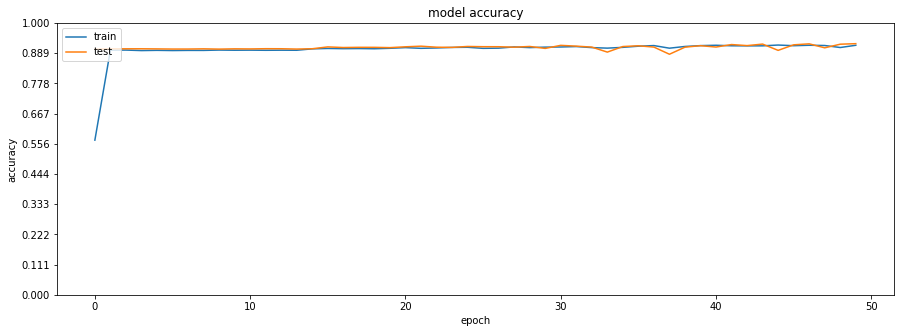

In [66]:
# summarize history for accuracy
ynum=np.linspace(0,1,10)
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.yticks(ynum)  #no. of points on y axis
plt.legend(['train', 'test'], loc='upper left')
plt.show()

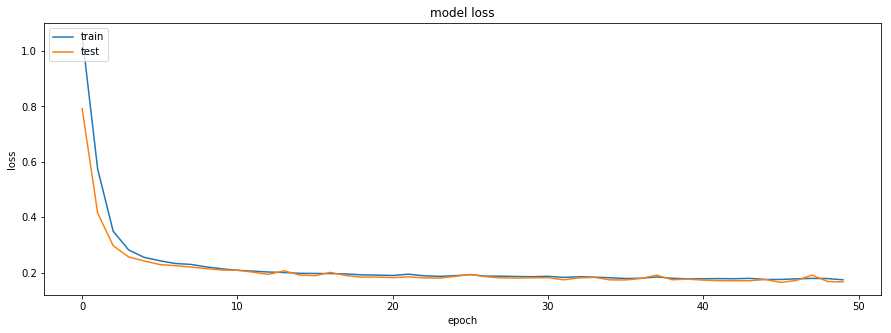

In [67]:
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
# Creating a model
np.random.seed(1337)
#while initializing weights using w=np.random.random*np.sqrt(2/n[l-1])
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense`,'Dropout' from `keras.layers`
from keras.layers import Dense,Dropout

# Initialize the constructor
model1 = Sequential()

# Add an input layer 
model1.add(Dense(128, activation='relu', input_shape=(12,)))

model.add(Dropout(0.5))

# Add one hidden layer 
model1.add(Dense(64, activation='relu'))

model.add(Dropout(0.4))

# Add one hidden layer 
model1.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))

# Add one hidden layer 
model1.add(Dense(8, activation='relu'))

model.add(Dropout(0.1))

# Add an output layer 
model1.add(Dense(classes, activation='softmax'))

In [69]:
# Compiling model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
history1=model1.fit(X_train, y_train, epochs=200, validation_split=0.2,verbose=2, batch_size=128,
                                    initial_epoch=0, shuffle=True)


Train on 70400 samples, validate on 17600 samples
Epoch 1/200
 - 2s - loss: 6.0242 - acc: 0.6254 - val_loss: 5.8511 - val_acc: 0.6367
Epoch 2/200
 - 2s - loss: 5.9320 - acc: 0.6318 - val_loss: 5.8286 - val_acc: 0.6383
Epoch 3/200
 - 2s - loss: 5.9338 - acc: 0.6318 - val_loss: 5.8422 - val_acc: 0.6374
Epoch 4/200
 - 2s - loss: 2.2168 - acc: 0.8618 - val_loss: 1.5292 - val_acc: 0.9049
Epoch 5/200
 - 2s - loss: 1.5992 - acc: 0.9005 - val_loss: 1.4880 - val_acc: 0.9076
Epoch 6/200
 - 2s - loss: 1.5827 - acc: 0.9016 - val_loss: 1.4593 - val_acc: 0.9093
Epoch 7/200
 - 2s - loss: 1.5408 - acc: 0.9043 - val_loss: 1.4512 - val_acc: 0.9098
Epoch 8/200
 - 2s - loss: 1.5480 - acc: 0.9039 - val_loss: 1.4435 - val_acc: 0.9104
Epoch 9/200
 - 2s - loss: 1.5450 - acc: 0.9039 - val_loss: 1.4574 - val_acc: 0.9095
Epoch 10/200
 - 2s - loss: 1.2245 - acc: 0.9029 - val_loss: 0.2464 - val_acc: 0.9183
Epoch 11/200
 - 2s - loss: 0.2130 - acc: 0.9197 - val_loss: 0.1660 - val_acc: 0.9243
Epoch 12/200
 - 2s - los

In [71]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("\nAccuracy: %.2f%%" % (scores[1]*100))


Accuracy: 97.88%


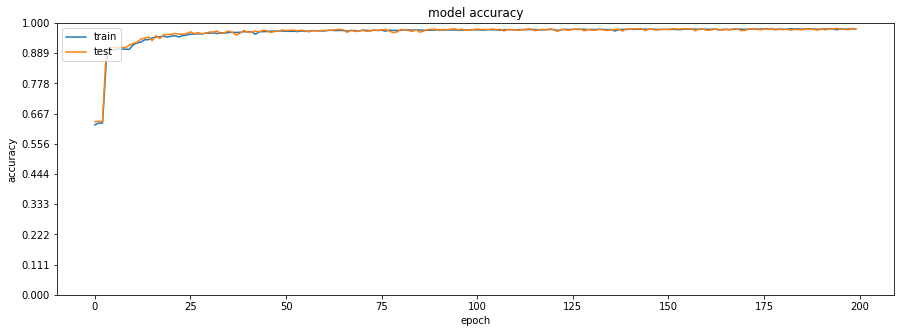

In [72]:
# summarize history for accuracy
ynum=np.linspace(0,1,10)
plt.figure(figsize=(15,5))
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.yticks(ynum)  #no. of points on y axis
plt.legend(['train', 'test'], loc='upper left')
plt.show()

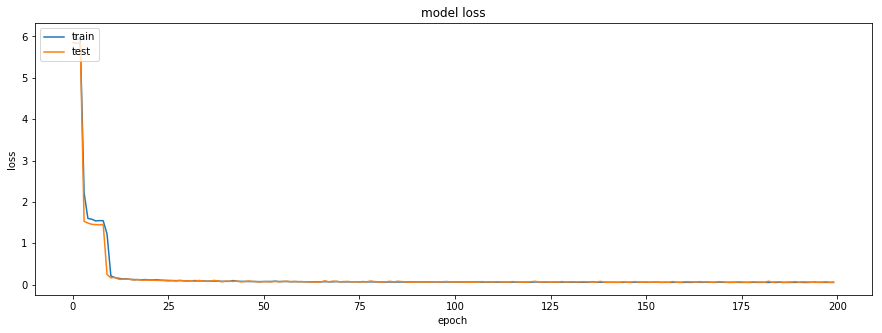

In [73]:
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()